##Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import scipy
from scipy import signal

import os
import keras
import tensorflow as tf

from keras.models import Model
from tf.keras import layers
from keras import layers

import numpy as np
from keras import backend as K
from keras.utils import np_utils

import math
from keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.constraints import max_norm

In [ ]:
initializer = tf.keras.initializers.HeNormal()
bias_init = keras.initializers.Constant(value=0.2)

##Load Some Datafiles

In [ ]:
t = np.load('/content/drive/MyDrive/IndividualData/A01T_X.npy')
e = np.load('/content/drive/MyDrive/IndividualData/A01E_X.npy')
ty = np.load('/content/drive/MyDrive/IndividualData/A01T_Y.npy')
ey = np.load('/content/drive/MyDrive/IndividualData/A01E_Y.npy')


In [ ]:
# Print the array
print(t)


[[[ -5.71289062  -6.88476562  -3.80859375 ...   6.640625     9.27734375
     8.49609375]
  [ -2.97851562  -2.68554688  -1.26953125 ...   3.46679688   2.39257812
     3.22265625]
  [ -5.61523438  -7.76367188  -5.37109375 ...   4.44335938   7.27539062
     5.95703125]
  ...
  [  0.09765625  -0.92773438  -1.46484375 ...   7.27539062   8.83789062
     4.00390625]
  [ -1.5625      -3.22265625  -3.66210938 ...   4.05273438   6.15234375
     2.1484375 ]
  [ -0.14648438  -3.46679688  -4.34570312 ...   7.08007812   7.76367188
     0.5859375 ]]

 [[-11.328125   -11.27929688  -7.8125     ...   2.88085938   1.61132812
    11.57226562]
  [-11.86523438 -12.06054688 -13.8671875  ...   1.5625       3.17382812
    10.44921875]
  [-10.20507812 -10.88867188  -9.765625   ...   3.41796875   2.24609375
    12.45117188]
  ...
  [ -5.2734375   -7.66601562  -7.2265625  ... -13.72070312 -13.18359375
    -4.24804688]
  [ -4.58984375  -6.49414062  -5.2734375  ... -11.71875    -12.45117188
    -3.66210938]
  [ -6.

##Data Analysis

In [ ]:
# Print the shape of the array
print(t.shape)

(288, 22, 1875)


In [ ]:
# Accessing the first sample, first channel, and first 10 data points
sample = t[0]
channel = t[0][0]
data_points = t[0][0][:10]

print("Sample:")
print(sample)
print("Channel:")
print(channel)
print("Data points:")
print(data_points)


Sample:
[[-5.71289062 -6.88476562 -3.80859375 ...  6.640625    9.27734375
   8.49609375]
 [-2.97851562 -2.68554688 -1.26953125 ...  3.46679688  2.39257812
   3.22265625]
 [-5.61523438 -7.76367188 -5.37109375 ...  4.44335938  7.27539062
   5.95703125]
 ...
 [ 0.09765625 -0.92773438 -1.46484375 ...  7.27539062  8.83789062
   4.00390625]
 [-1.5625     -3.22265625 -3.66210938 ...  4.05273438  6.15234375
   2.1484375 ]
 [-0.14648438 -3.46679688 -4.34570312 ...  7.08007812  7.76367188
   0.5859375 ]]
Channel:
[-5.71289062 -6.88476562 -3.80859375 ...  6.640625    9.27734375
  8.49609375]
Data points:
[ -5.71289062  -6.88476562  -3.80859375  -6.59179688   4.6875
   1.51367188  -2.29492188  -3.61328125  -4.58984375 -10.79101562]


##Plotting Insights

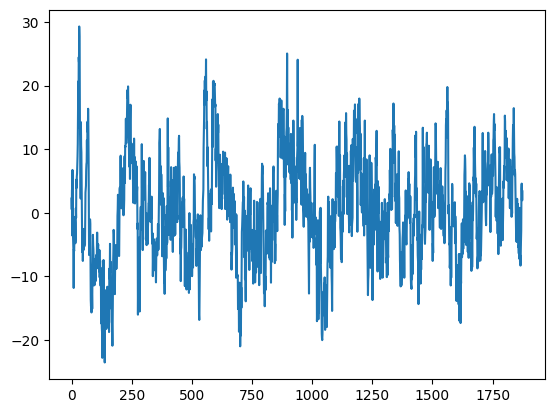

In [ ]:
plt.plot(t[0][6])
plt.show()

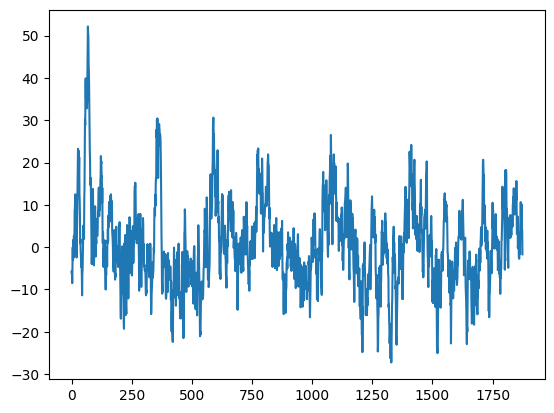

In [ ]:
plt.plot(e[0][7])
plt.show()

##Data Pre Processing using MNE method

Explanation:



*   The bandpass_filter() function takes in an input trials_c, which represents the trials or data that need to be filtered.
*   It computes the shape of the input trials using np.shape().
The sampling frequency (fs) and the lower (lowcut) and upper (highcut) cutoff frequencies for the bandpass filter are extracted.


*   The Nyquist frequency (nyq) is computed as half of the sampling frequency.
The filter cutoff frequencies are normalized by dividing them by the Nyquist frequency.
*   The order parameter determines the filter order.
An array called new_trials is initialized to store the filtered trials.
The function applies bandpass filtering to each trial in the input data using a Butterworth filter design (signal.butter()).




*   The filtfilt() function is used to apply zero-phase forward and reverse filtering to remove phase distortion.
The filtered trial is stored in the new_trials array.
*   Finally, the function returns the new_trials array containing the filtered trials. This code allows you to apply a bandpass filter to your EEG trials, ensuring that the data falls within the specified frequency range.









In [ ]:
def bandpass_filter(trials_c, lc, hc, order = 5):
    shape = np.shape(trials_c)

    fs = float(shape[2])
    lowcut = lc
    highcut = hc

    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    order = order
    new_trials = np.zeros([shape[0],shape[1],shape[2]])
    for i in range(0,shape[0]):
        for j in range(0,shape[1]):
            b,a = signal.butter(order, [low,high],'bandpass', analog = False)
            y = signal.filtfilt(b, a, trials_c[i][j], axis = 0)
            new_trials[i][j] = y

    return new_trials

Explanation:


*   The filter function takes a trials parameter, which represents the input trials (presumably EEG data).
*   The function applies a bandpass filter to the trials using the bandpass_filter function.
The first bandpass filter is applied in the frequency range of 1 to 30 Hz, and the filtered trials are stored in the variable t1to30.


*   The second bandpass filter is applied in the frequency range of 1 to 125 Hz, and the filtered trials are stored in the variable t1to125.
*   Finally, the function returns both sets of filtered trials, t1to30 and t1to125.


The purpose of this code is to filter the input trials using different frequency ranges and examine the resulting shapes of the filtered data. It serves as a preprocessing step before further analysis or modeling tasks.

In [ ]:
def filter(trials):
    t1to30 = bandpass_filter(trials,1,30, order = 2)
    print(np.shape(t1to30))
    t1to125 = bandpass_filter(trials,1,125, order = 2)
    print(np.shape(t1to125))
    return t1to30,t1to125

Explanation:


*   The function data_augmentation() performs data augmentation on EEG trials.
The subject parameter is used to specify the subject ID for which data augmentation will be performed.
*   The EEG trials and corresponding classes are loaded from the specified file paths.

*   A subset of the trials, starting from the 500th time sample and ending at the 1250th time sample, is extracted for training.
The variables start and end are initialized to set the indices for data augmentation.
*   A loop is used to perform data augmentation by concatenating additional trials to the training data.


*   In each iteration of the loop, a subset of trials specified by the start and end indices is extracted for augmentation.
*   The start and end indices are updated for the next augmentation iteration.
The augmented trials and their corresponding classes are concatenated to the existing training data.

After all augmentation iterations, the augmented training data and corresponding labels are returned.

In [ ]:
def data_augmentation(subject = 1):
    subject = subject
    trials = np.load('/content/drive/MyDrive/IndividualData/A0' + str(subject)+'T_X.npy')
    classes = np.load('/content/drive/MyDrive/IndividualData/A0' + str(subject)+'T_Y.npy')
    x_train = trials[:,:,500:1250]
    y_train = classes
    start = 550
    end = 1300
    for i in range(1,9):
        new_trials = trials[:,:,start:end]
        start = start + 50
        end = end + 50
        x_train = np.concatenate((x_train, new_trials), axis = 0)
        y_train =  np.concatenate((y_train, classes), axis = 0)

    return x_train, y_train


# Model Evaluation

##Classify all 4 CLASSES through Convolutional Neural Network (CNN) Model

##Other Metrics: (ACCURACY, Confusion Matrix, F1 SCORE, KAPPA SCORE, PRECISION)

The code iterates over 9 subjects and performs the following steps for each subject:

1.   Load and preprocess the training and testing data.
2.   Remove unwanted classes (foot and tongue) from the training and testing data.
Concatenate the selected classes (left hand, right hand, foot, tongue) for testing.


3.   Reshape the training and testing data for the input shape expected by the CNN model.

4.   Convert the labels to categorical format.

5.   Define the architecture of the CNN model.
6.   Compile and train the model on the training data.


7.   Evaluate the trained model on the testing data and print the loss and accuracy.
8.   Perform predictions on the testing data and calculate the confusion matrix, F-score, and Cohen's kappa score. Append the evaluation metrics to the respective lists.


9.   After iterating over all subjects, calculate the average confusion matrix, F-score, and kappa score.
10.   Print the average evaluation metrics.



In [2]:
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.constraints import max_norm

# Initialize lists to store accuracy and confusion matrices
accuracies = []
confusion_matrices = []
f1_scores = []
precision_scores = []

# Define class labels
class_labels = ['left hand', 'right hand', 'foot', 'tongue']

Subject ID: 1
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 22, 750, 8)   208         ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 22, 750, 16)  736         ['input_2[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 22, 750, 32)  2112        ['input_2[0

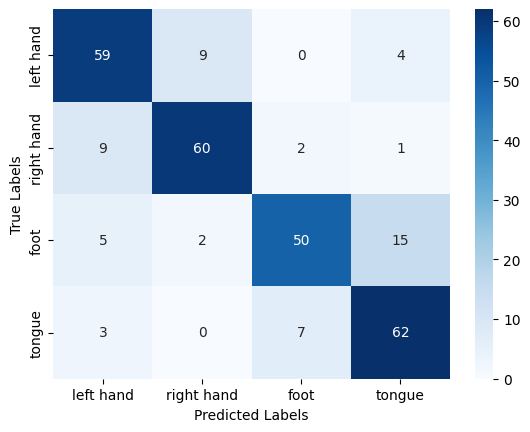

Subject ID: 2
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_6 (Conv2D)              (None, 22, 750, 8)   208         ['input_3[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 22, 750, 16)  736         ['input_3[0][0]']                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 22, 750, 32)  2112        ['input_3[0

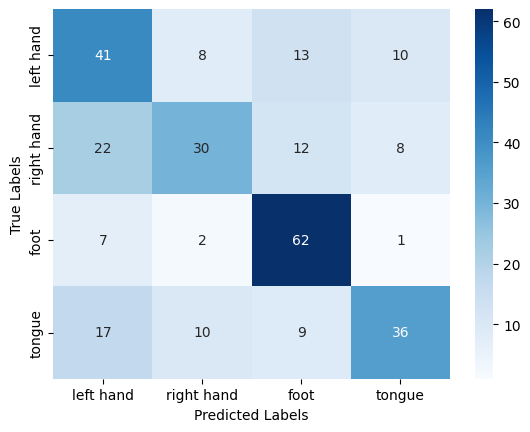

Subject ID: 3
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 22, 750, 8)   208         ['input_4[0][0]']                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 22, 750, 16)  736         ['input_4[0][0]']                
                                                                                                  
 conv2d_11 (Conv2D)             (None, 22, 750, 32)  2112        ['input_4[0

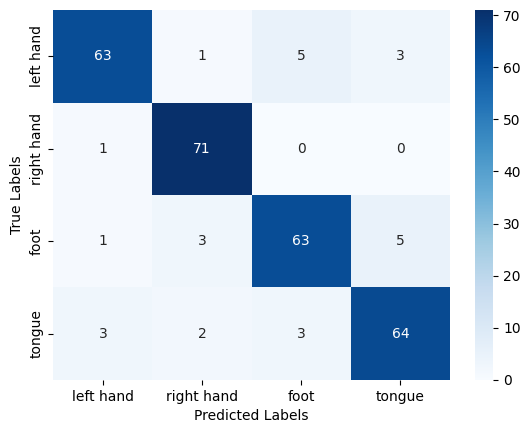

Subject ID: 4
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 22, 750, 8)   208         ['input_5[0][0]']                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 22, 750, 16)  736         ['input_5[0][0]']                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 22, 750, 32)  2112        ['input_5[0

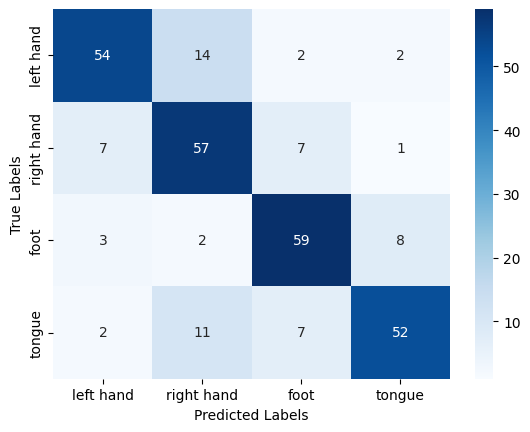

Subject ID: 5
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 22, 750, 8)   208         ['input_6[0][0]']                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 22, 750, 16)  736         ['input_6[0][0]']                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 22, 750, 32)  2112        ['input_6[0

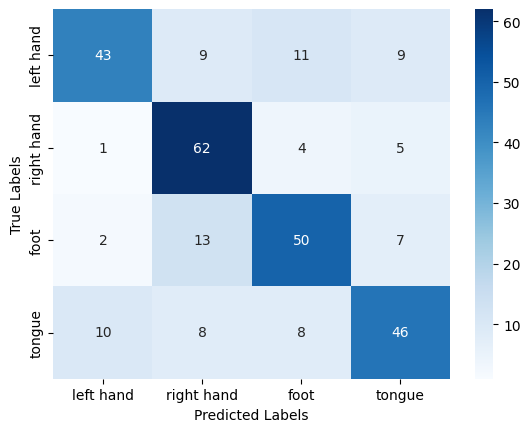

Subject ID: 6
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_18 (Conv2D)             (None, 22, 750, 8)   208         ['input_7[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 22, 750, 16)  736         ['input_7[0][0]']                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 22, 750, 32)  2112        ['input_7[0

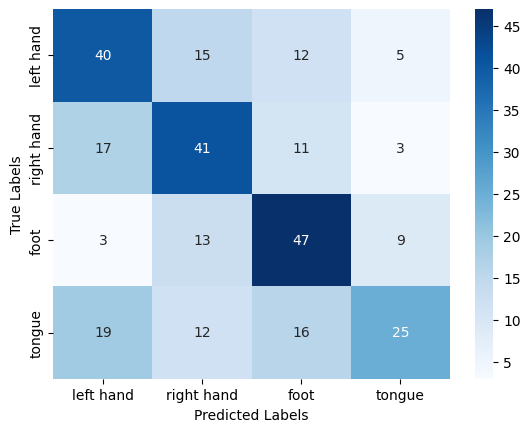

Subject ID: 7
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 22, 750, 8)   208         ['input_8[0][0]']                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 22, 750, 16)  736         ['input_8[0][0]']                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 22, 750, 32)  2112        ['input_8[0

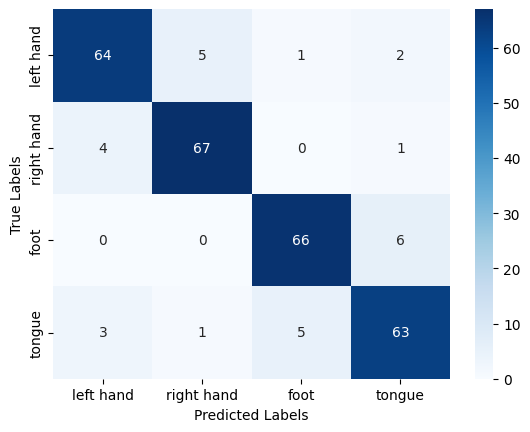

Subject ID: 8
Model: "HS-EEGNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 22, 750, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 22, 750, 8)   208         ['input_9[0][0]']                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 22, 750, 16)  736         ['input_9[0][0]']                
                                                                                                  
 conv2d_26 (Conv2D)             (None, 22, 750, 32)  2112        ['input_9[0

In [ ]:
for sub in range(1, 10):
    x_train, y_train = data_augmentation(sub)
    print("Subject ID:", sub)

    x_test = np.load('/content/drive/MyDrive/IndividualData/A0' + str(sub) + 'E_X.npy')
    y_test = np.load('/content/drive/MyDrive/IndividualData/A0' + str(sub) + 'E_Y.npy')
    x_test = x_test[:, :, 500:1250]

    left_hand = np.where(y_test == 0)
    right_hand = np.where(y_test == 1)
    foot = np.where(y_test == 2)
    tongue = np.where(y_test == 3)

    x_test = np.concatenate(
        (x_test[left_hand], x_test[right_hand], x_test[foot], x_test[tongue]), axis=0
    )
    y_test = np.concatenate(
        (
            y_test[left_hand],
            y_test[right_hand],
            y_test[foot],
            y_test[tongue],
        ),
        axis=0,
    )

    left_hand_train = np.where(y_train == 0)
    right_hand_train = np.where(y_train == 1)
    foot_train = np.where(y_train == 2)
    tongue_train = np.where(y_train == 3)

    x_train = np.concatenate(
        (x_train[left_hand_train], x_train[right_hand_train], x_train[foot_train], x_train[tongue_train]), axis=0
    )
    y_train = np.concatenate(
        (
            y_train[left_hand_train],
            y_train[right_hand_train],
            y_train[foot_train],
            y_train[tongue_train],
        ),
        axis=0,
    )

    x_train = x_train.reshape((-1, 22, 750, 1))
    x_test = x_test.reshape((-1, 22, 750, 1))

    num_classes = 4

    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    input_layer = layers.Input(shape=(22, 750, 1))

    x1 = layers.Conv2D(8,(1, 25), strides=(1, 1), padding='same', activation='linear')(input_layer)
    x2 = layers.Conv2D(16,(1, 45), strides=(1, 1), padding='same', activation='linear')(input_layer)
    x3 = layers.Conv2D(32,(1, 65), strides=(1, 1), padding='same', activation='linear')(input_layer)

    x1 = layers.BatchNormalization()(x1)
    x2 = layers.BatchNormalization()(x2)
    x3 = layers.BatchNormalization()(x3)

    x1 = layers.DepthwiseConv2D(kernel_size=(22, 1),strides=(1, 1) , depth_multiplier = 2, depthwise_constraint = max_norm(1.0))(x1)
    x2 = layers.DepthwiseConv2D(kernel_size=(22, 1),strides=(1, 1) , depth_multiplier = 2, depthwise_constraint = max_norm(1.0))(x2)
    x3 = layers.DepthwiseConv2D(kernel_size=(22, 1),strides=(1, 1) , depth_multiplier = 2, depthwise_constraint = max_norm(1.0))(x3)

    x1 = layers.BatchNormalization()(x1)
    x2 = layers.BatchNormalization()(x2)
    x3 = layers.BatchNormalization()(x3)

    x1 = layers.Activation('elu')(x1)
    x2 = layers.Activation('elu')(x2)
    x3 = layers.Activation('elu')(x3)

    x1 = layers.AveragePooling2D((1, 4))(x1)
    x2 = layers.AveragePooling2D((1, 4))(x2)
    x3 = layers.AveragePooling2D((1, 4))(x3)

    x1 = layers.Dropout(0.1)(x1)
    x2 = layers.Dropout(0.2)(x2)
    x3 = layers.Dropout(0.4)(x3)

    x1 = layers.SeparableConv2D(16, (1, 16), use_bias = False, padding = 'same', activation='linear')(x1)
    x2 = layers.SeparableConv2D(16, (1, 16), use_bias = False, padding = 'same', activation='linear')(x2)
    x3 = layers.SeparableConv2D(16, (1, 16), use_bias = False, padding = 'same', activation='linear')(x3)

    x1 = layers.BatchNormalization()(x1)
    x2 = layers.BatchNormalization()(x2)
    x3 = layers.BatchNormalization()(x3)

    x1 = layers.Activation('elu')(x1)
    x2 = layers.Activation('elu')(x2)
    x3 = layers.Activation('elu')(x3)

    x1 = layers.AveragePooling2D((1, 8))(x1)
    x2 = layers.AveragePooling2D((1, 8))(x2)
    x3 = layers.AveragePooling2D((1, 8))(x3)

    x1 = layers.Dropout(0.1)(x1)
    x2 = layers.Dropout(0.2)(x2)
    x3 = layers.Dropout(0.4)(x3)

    f1 = layers.Flatten()(x1)
    f2 = layers.Flatten()(x2)
    f3 = layers.Flatten()(x3)

    c = layers.concatenate([f1,f2,f3], axis = 1)

    x = layers.Dense(num_classes, activation='softmax')(c)

    model = Model(input_layer, x, name='HS-EEGNET')
    model.summary()

    opt = Adam(learning_rate=0.0009)

    epochs = 1000

    callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=75, restore_best_weights=True)]
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs,
                        batch_size=128, callbacks=callbacks)

    model.save('/content/drive/MyDrive/eeg/S0' + str(sub) + 'Model.h5')

    # Perform predictions on the test data
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(y_pred_labels == y_true_labels)
    accuracies.append(accuracy)

    # Calculate additional metrics
    kappa = cohen_kappa_score(y_true_labels, y_pred_labels)
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')

    # Append the metrics to the respective lists
    kappa_scores.append(kappa)
    f1_scores.append(f1)
    precision_scores.append(precision)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=range(num_classes))
    confusion_matrices.append(cm)

    # Print accuracy for the subject
    print("Accuracy for Subject", sub, ":", accuracy)

    # Print confusion matrix using seaborn
    print("Confusion Matrix for Subject", sub)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Calculate other metrics
average_kappa = np.mean(kappa_scores)
average_f1 = np.mean(f1_scores)
average_precision = np.mean(precision_scores)

# Calculate average confusion matrix
average_cm = np.mean(confusion_matrices, axis=0)

# Print average confusion matrix using seaborn
print("Average Confusion Matrix:")
sns.heatmap(average_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print average accuracy
print("Average Accuracy:", average_accuracy)

# Print the other metrics
print("Average Kappa Score:", average_kappa)
print("Average F1 Score:", average_f1)
print("Average Precision:", average_precision)
